In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(rwantshue)
library(magrittr)
library(plyr);library(dplyr)
library(ggplot2)
library(RCurl)
library(ape)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:stats’:

    filter

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: bitops


In [68]:
ls 

CasjensBLAST.ipynb
TerminaseLibeEdit.ipynb
Terminase_Extract.ipynb
Terminase_Info.txt
TreeInvestigation.ipynb
akmk_terminases/
ctermblast.sh
jmb_casjens_library/
makeblastdb.sh
nahant_phage_terminasesvsCasjens_terminases.txt
new_terminase_categories.txt
term_short_nahant_term.aln.fasta
term_short_nahant_term.aln.masked.fasta
term_short_nahant_term.fasta
term_short_nahant_term.fasta.fai
terminase/


In [17]:
from pyfaidx import Fasta
f=Fasta("term_short_nahant_term.fasta")
titles=f.keys()

In [18]:
%%R -i titles


Code<-titles
code1<-data.frame(Code)
str(code1)

'data.frame':	462 obs. of  1 variable:
 $ Code: Factor w/ 462 levels "0305phi8-36",..: 2 3 4 5 6 7 8 9 10 11 ...


In [165]:
%%R
info=read.table("Terminase_Info.txt", sep="\t", header=TRUE)
nahantinfo=read.table("new_terminase_categories.txt", sep="\t")


In [166]:
%%R 
#Table 1

info=read.table("Terminase_Info.txt", sep="\t", header=TRUE)
nahantinfo=read.table("new_terminase_categories.txt", sep="\t")


info1<-info[,c(2,3)]
colnames(info1)<-c("Code","Group")

nahantinfo$Code<-nahantinfo$V1
nahantinfo$Group<-nahantinfo$V3
nahantinfo1<-nahantinfo[,c(5,6)]
head(nahantinfo1)




combo<-rbind(info1,nahantinfo1)

str(combo)

combo<-merge(combo, code1, by="Code", all.y=TRUE)
combo$Group[combo$Group=="<NA>"]<-"unknown"
combo[is.na(combo)]<-"unknown"
head(combo)
#combo$Group%>%unique

N<-combo$Group%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)

col.combo<-data.frame(tt_colors=colors, tt=combo$Group%>%unique)
combo$tt_col<-col.combo$tt_colors[match(combo$Group, col.combo$tt)]

combo$range<-"range"

combo$tt_col[is.na(combo$Group)]<-"#D8D8D8"

write.table(combo[,c(1,4,3,2)],file="term_short_nahant_term.cols1.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

'data.frame':	354 obs. of  2 variables:
 $ Code : Factor w/ 354 levels "186a","21","7201",..: 2 3 1 4 6 5 7 8 9 10 ...
 $ Group: Factor w/ 13 levels "3-cos/HK97","5-cos/P2",..: 3 1 2 5 1 8 12 10 9 11 ...


In [167]:
%%R -i titles
#table 2
info=read.table("Terminase_Info.txt", sep="\t", header=TRUE)
info1<-info[,c(2,3)]
colnames(info1)<-c("Code","Group")
str(info)

nnames<-read.table("../ImportantInfo/new_nahantphage_clusters.txt", sep="\t",header=TRUE)%>%.[,1]
nahantinfo<-cbind.data.frame(nnames,"nahant")
colnames(nahantinfo)<-c("Code","Group")

combo<-rbind(nahantinfo, info1)


combo<-merge(combo, code1, by="Code", all.y=TRUE)
combo$Group[combo$Group=="<NA>"]<-"unknown"
combo$Group[is.na(combo$Group)]<-"unknown"

N<-combo$Group%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)

col.combo<-data.frame(tt_colors=colors, tt=combo$Group%>%unique)
combo$tt_col<-col.combo$tt_colors[match(combo$Group, col.combo$tt)]


combo$tt_col[is.na(combo$Group)]<-"#D8D8D8"

combo$range<-"range"

write.table(combo[,c(1,4,3,2)],file="term_short_nahant_term.cols2.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

'data.frame':	116 obs. of  5 variables:
 $ Name             : Factor w/ 116 levels "Achromobacter_phage_JWAlpha",..: 64 97 35 18 48 61 44 4 16 73 ...
 $ Code             : Factor w/ 116 levels "186a","21","7201",..: 2 3 1 4 6 5 7 8 9 10 ...
 $ Terminase_Type   : Factor w/ 13 levels "3-cos/HK97","5-cos/P2",..: 3 1 2 5 1 8 12 10 9 11 ...
 $ Ambiguous        : Factor w/ 2 levels "n","y": 2 1 2 1 1 1 1 1 1 1 ...
 $ General_Terminase: Factor w/ 5 levels "Cos","DTR","Headful",..: 1 1 1 3 1 3 5 3 3 4 ...


In [58]:
%%R 
#Table 3

ngroups=read.table("../ImportantInfo/new_nahantphage_clusters.txt", sep="\t", header=TRUE)
colnames(ngroups)<-c("Code","Group")
print(str(ngroups))

#assign colors to each category:
#N<-combo$Terminase_Type%>%unique%>%length
N<-ngroups$Group%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$fancy_light)
#col.combo<-data.frame(tt_colors=colors, tt=combo$Terminase_Type%>%unique)
col.combo<-data.frame(clust_cols=colors, clust=ngroups$Group%>%unique)
ngroups$clust_col<-col.combo$clust_cols[match(ngroups$Group, col.combo$clust)]
head(ngroups)

group_def<-ngroups
group_def$range<-"range"
group_def

write.table(group_def[,c(1,4,3,2)], file="phage_clusts_def.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
#write.table(ngroups[,c(1,3)],file="phage_clusts.cols.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

'data.frame':	287 obs. of  2 variables:
 $ Code : Factor w/ 287 levels "1.003.O.","1.004.O.",..: 118 195 200 120 105 113 126 209 214 55 ...
 $ Group: Factor w/ 28 levels "","1","10","11",..: 2 2 2 2 2 2 2 2 2 2 ...
NULL


In [15]:
!muscle -in term_short_nahant_term.fasta -out term_short_nahant_term.aln.fasta


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.


*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA

In [22]:
!head -n5 term_short_nahant_term.aln.fasta

>Gj1
------------------------------------------------------------
------------------------------------------------------------
--------------------------------MATDDLGPEFNDTVASYLAKHYGDVLKV
SRERFCILSLPLLRRYISE----NTAIVDSYEEQ--------IQAELEGQ--GLENDAVL


In [3]:
from skbio.alignment import Alignment
from skbio.sequence import DNA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itolapi import Itol, ItolExport
from IPython.display import Image
%matplotlib inline

In [35]:
aln=Alignment.read(file="term_short_nahant_term.aln.fasta", format="fasta")
gap_freq=[d["-"] for d in aln.position_frequencies()]
len(gap_freq)
fig, ax = plt.subplots()
fig.set_size_inches([16,3])
ax.plot(np.arange(len(gap_freq)), gap_freq)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

2371

In [8]:
keepers, = np.where(np.array(gap_freq)<=0.40)
aln_masked = aln.subalignment(positions_to_keep=keepers)
gap_freq2=[d["-"] for d in aln_masked.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16,3])
ax.plot(np.arange(len(gap_freq2)), gap_freq2)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

446

In [10]:
aln_masked.write("term_short_nahant_term.aln.masked.fasta", format="fasta")

'term_short_nahant_term.aln.masked.fasta'

In [60]:
!head -n2 term_short_nahant_term.aln.masked.fasta

>Gj1
LPLLRRYISENTAIVDSYEEQIQAELEGQGLENDAVLRSVFRAGSTLEEPNSEHDNTDELVDKILHDVRKIL-MKSEAFGK-VIFNVGQKLPLYSFCHNESSHNIITSYAEDVVLESSGYIRAVMMD-PLFQRIFPPNKRSLERWGTTMHAVPTGGKLTGKGAGLLVAYS---GCFVVDDVIKDAYSDTVRAEINDRFDNTFMSRLANDGITDSYGNQIKCMVRHDQLRGGKYHYLNIPAIIEKEWYDKLPILYNLNRKLWPSRKSLESLEA----MKESN--PYTYSQYAGDPSAQGHGLIKEDWWQEYEDVFDR-IVRSFI-TADTADYSVLKHWGVTKER--DVYCLDIMLGKFETPELK-TAIIDFWNKCNKLDLKCVGCIPRALYM-EKSAGQFLNQ----QFIRGSVRVLPLPRDGI------NGNDKVTRFLNAIPYF-------SQKRIFFPAGHEHI-DHVRRTSLGS-----------GTGHDDCVDNVSDMVA-IEFSGPSANYSAWM---


In [11]:
%%bash
fasttree <term_short_nahant_term.aln.masked.fasta > term_short_nahant_term.40.tree 

FastTree Version 2.1.8 No SSE3
Alignment: standard input
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Ignored unknown character X (seen 5 times)
      0.12 seconds: Joined    100 of    385
      0.32 seconds: Joined    300 of    385
Initial topology in 0.44 seconds
Refining topology: 34 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.44 seconds: ME NNI round 1 of 34, 1 of 386 splits
      0.54 seconds: ME NNI round 4 of 34, 1 of 386 splits
      0.76 seconds: SPR round   1 of   2, 101 of 774 nodes
      0.90 seconds: SPR round   1 of   2, 201 of 774 nodes
      1.07 seconds: SPR round   1 of   2, 301 of 774 nodes
      1.25 seconds: SPR round   1 of   2, 401 of 774 nodes
      1.46 seconds: SPR round   1 of   2, 501 of 774 nodes
      1.61 seconds: SPR round   1 of   2

In [169]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', 'term_short_nahant_term.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'term_short_nahant_term')
itol_uploader.add_variable("colorDefinitionFile", "term_short_nahant_term.cols1.txt")
itol_uploader.add_variable("dataset1File","phage_clusts.cols.txt")
itol_uploader.add_variable("dataset1Type","colorstrip")
itol_uploader.add_variable("dataset1StripWidth","20")
itol_uploader.add_variable("dataset1Label","Nahant Cluster")
itol_uploader.add_variable("dataset1Separator","tab")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998782451512814398457370&restore_saved=1


In [94]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', 'term_short_nahant_term.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'term_short_nahant_term')
itol_uploader.add_variable("colorDefinitionFile", "term_short_nahant_term.cols2.txt")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998782453654114398314030&restore_saved=1


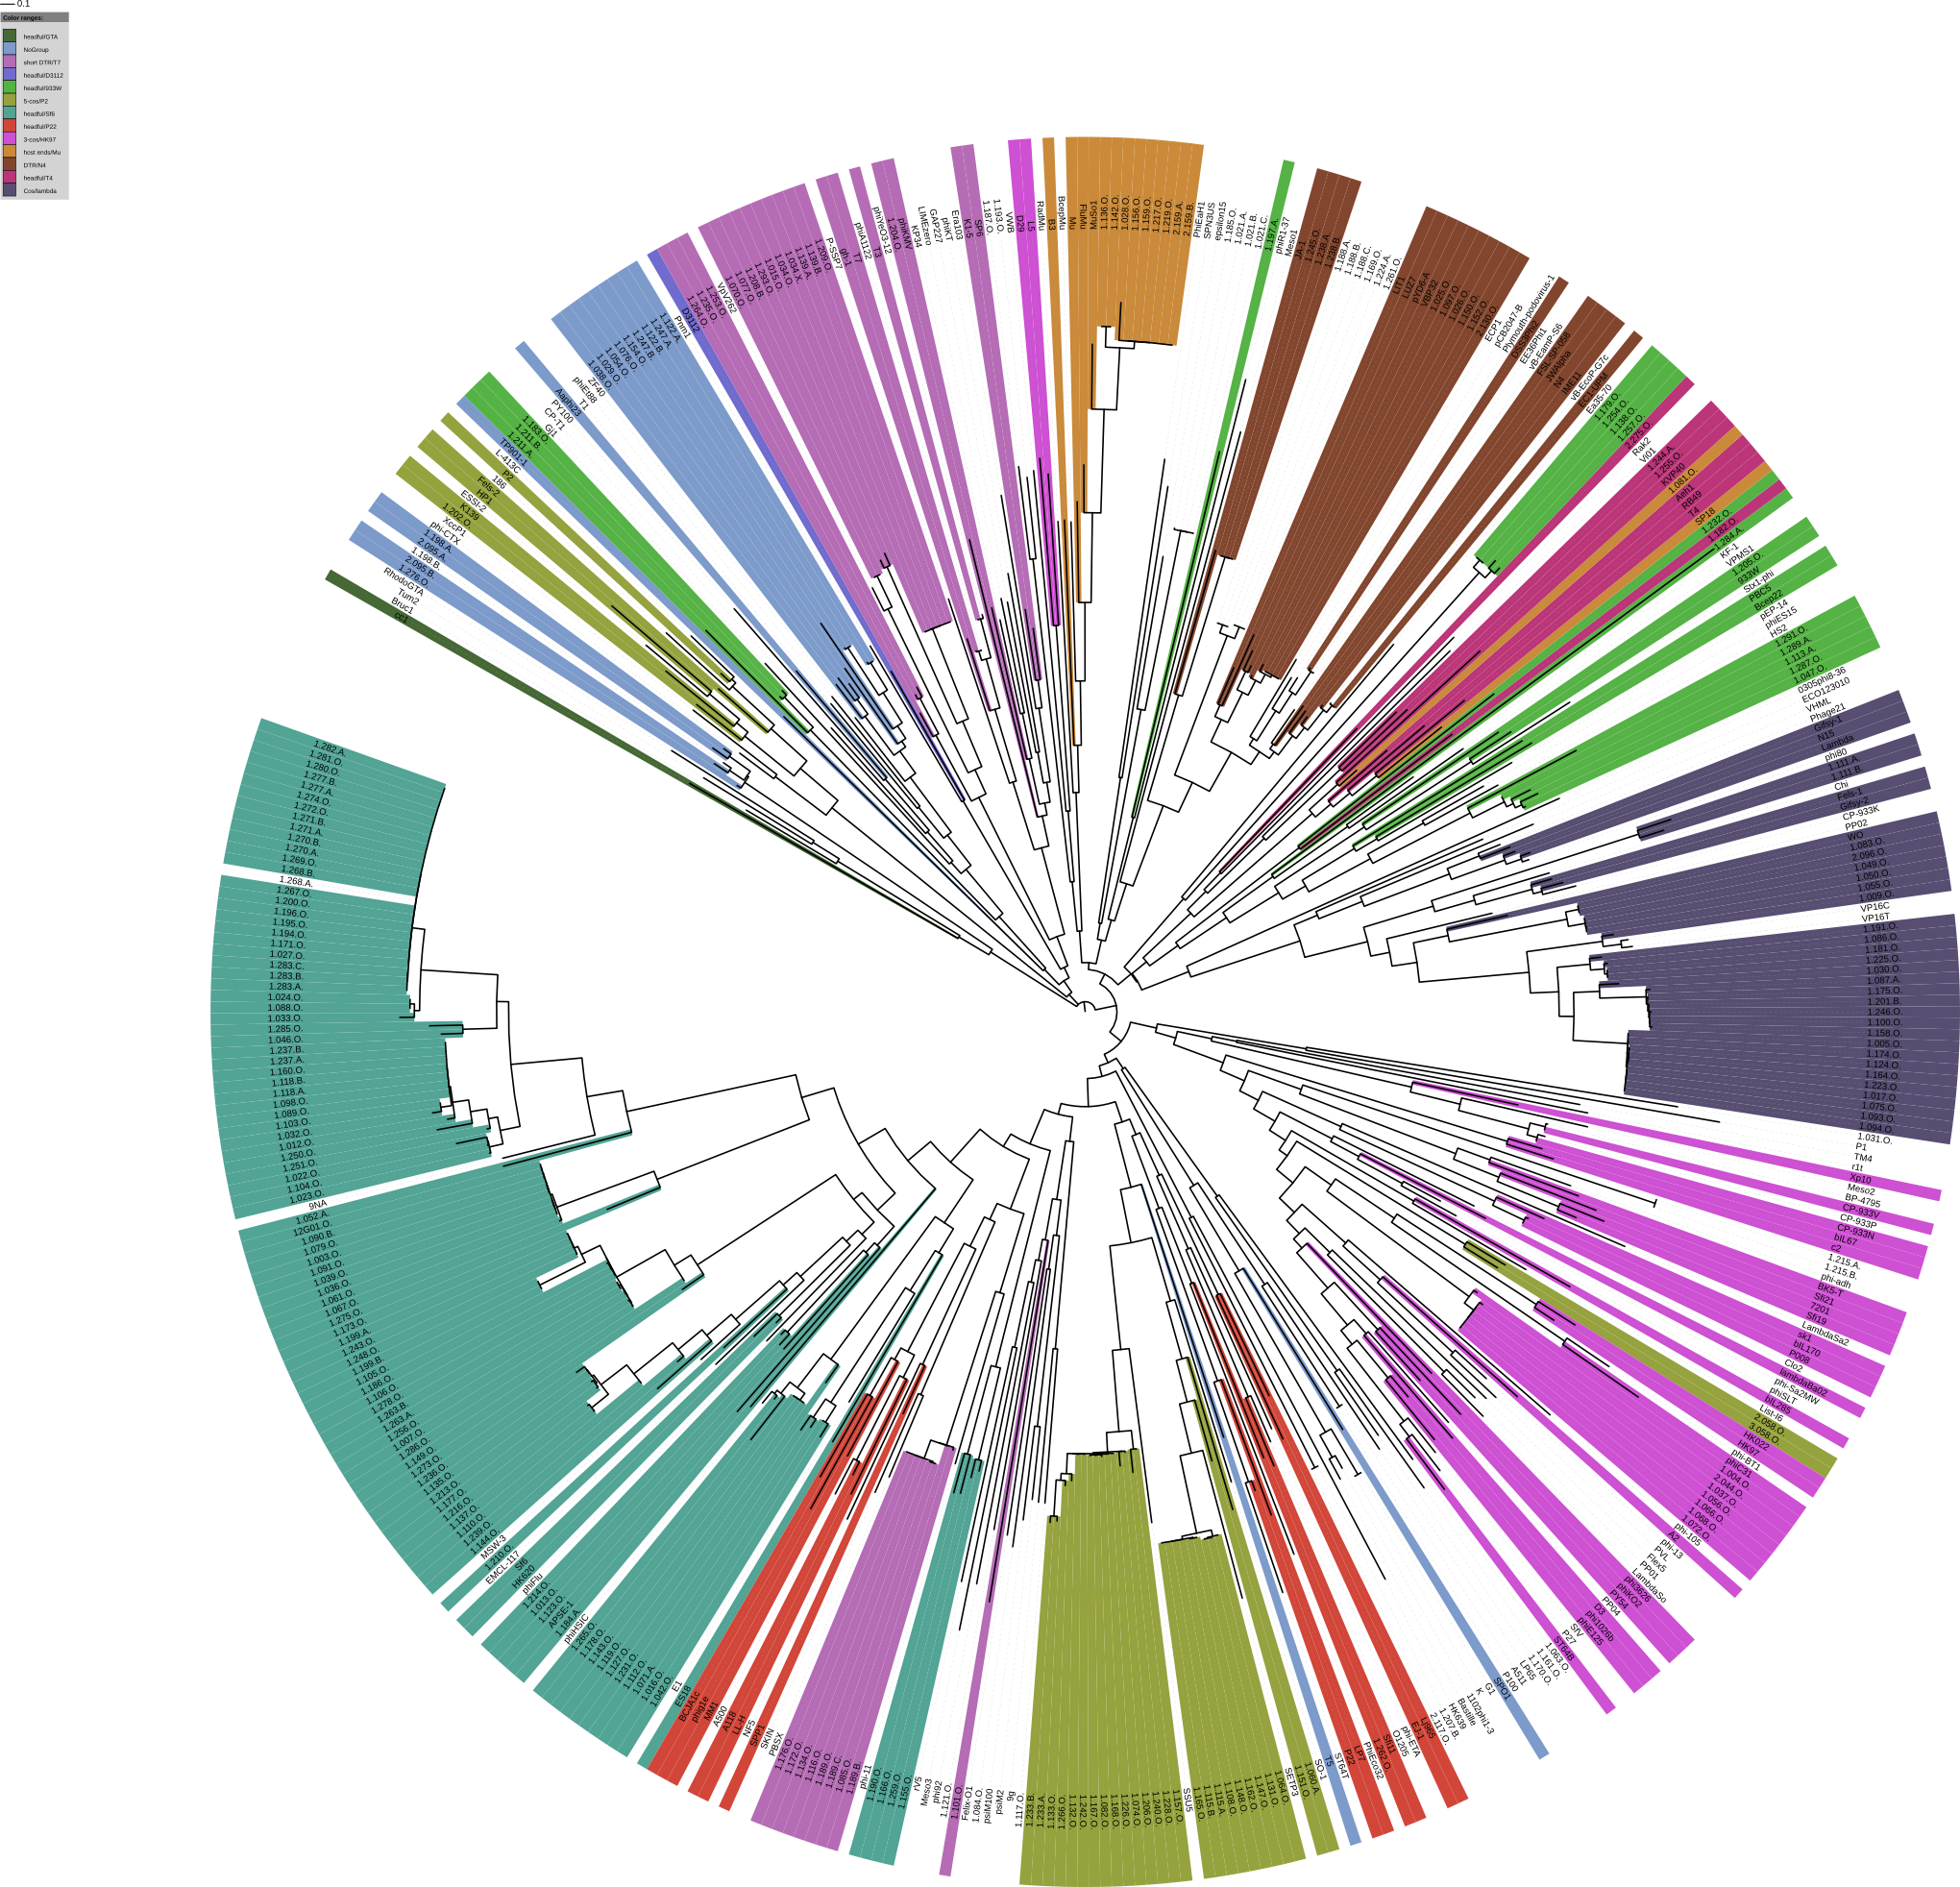

In [160]:
Image("term_short_nahant_term_plot2.png", width=800)

In [59]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', 'term_short_nahant_term.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'term_short_nahant_term')
itol_uploader.add_variable("colorDefinitionFile", "phage_clusts_def.txt")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998781852816114399212160&restore_saved=1


>colored by terminase assignment... either verified by publication, or assigned based on best blast match (for nahant reads)


####*now making separate trees... one with just nahant terminases*

In [113]:
ls ./terminase/

Textbook_terminases.fasta
lg.subunit.terminase.blast.sh
mega_cache_6140220/
n_and_t_terminases.fasta
n_and_t_terminases.mas
n_and_t_terminases.meg
nahant_phage_terminases.fasta
nahant_phage_terminases.fasta.fai
nahant_phage_terminases_muscle1.mas
nahant_phage_terminases_muscle1.meg
nahant_phage_terminases_muscle2_nogaps.mas
nahant_terminase_tree1.mts
nahant_terminase_tree1.nwk
nahant_terminase_tree2.nwk
nahant_terminase_tree3.nwk
phagelist.txt
term_short_nahant_term_clustalw1.mas
term_short_nahant_term_clustalw1.meg
terminase_tree1.mts
terminase_tree1.nwk
treekey.txt


In [114]:
!mkdir nahant_only

In [116]:
!muscle -in ./terminase/nahant_phage_terminases.fasta -out ./nahant_only/nahant_phage_terminases.aln.fasta


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.


*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA

In [117]:
!head -n 5 ./nahant_only/nahant_phage_terminases.aln.fasta

>1.182.O.
------------------------------MTIPKFAREAKDNFPLFSRNCLFIRTKEAG
VQPF----------------------------VLNKAQKY-------IHDKLEEQRLKT-
------------------GKVRAILLKGR--------------------------QQG-A
STYVEGRFI---WRTTM----------------------------SKGVRAFILT----H


In [118]:
aln=Alignment.read(file="./nahant_only/nahant_phage_terminases.aln.fasta", format="fasta")
gap_freq=[d["-"] for d in aln.position_frequencies()]

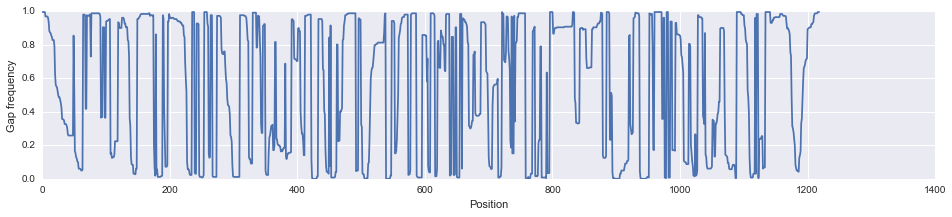

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches([16,3])
ax.plot(np.arange(len(gap_freq)), gap_freq)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [120]:
keepers, = np.where(np.array(gap_freq)<=0.40)
aln_masked = aln.subalignment(positions_to_keep=keepers)

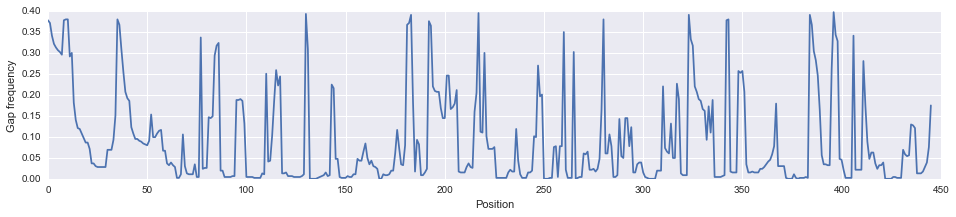

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches([16,3])
ax.plot(np.arange(len(gap_freq2)), gap_freq2)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [122]:
aln_masked.write("./nahant_only/nahant_phage_terminases.aln.masked.fasta", format="fasta")

'./nahant_only/nahant_phage_terminases.aln.masked.fasta'

In [123]:
%%bash
fasttree <./nahant_only/nahant_phage_terminases.aln.masked.fasta > ./nahant_only/nahant_phage_terminases.40.tree 

FastTree Version 2.1.8 No SSE3
Alignment: standard input
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Initial topology in 0.16 seconds
Refining topology: 30 rounds ME-NNIs, 2 rounds ME-SPRs, 15 rounds ML-NNIs
      0.15 seconds: ME NNI round 1 of 30, 1 of 192 splits
      0.38 seconds: SPR round   1 of   2, 101 of 386 nodes
      0.55 seconds: SPR round   1 of   2, 201 of 386 nodes
      0.74 seconds: SPR round   1 of   2, 301 of 386 nodes
      0.92 seconds: ME NNI round 11 of 30, 1 of 192 splits
      1.10 seconds: SPR round   2 of   2, 101 of 386 nodes
      1.27 seconds: SPR round   2 of   2, 201 of 386 nodes
      1.47 seconds: SPR round   2 of   2, 301 of 386 nodes
      1.64 seconds: ME NNI round 21 of 30, 1 of 192 splits
Total branch-length 81.278 after 1.69 sec
      2.03

>making the datasets to upload into iTol

In [18]:
%%R
phage_grps<-read.table("../ImportantInfo/new_nahantphage_clusters.txt", sep="\t",header=TRUE)
term_types<-read.table("../ImportantInfo/new_terminase_categories.txt", fill=TRUE, sep="\t")
kkgrp<-read.table("../ImportantInfo/phage_by_group.txt", sep="\t")
rc<-read.table("../ImportantInfo/read_coverage_patterns.txt",sep="\t", header=TRUE)

print(head(phage_grps))
print(head(term_types))
print(head(kkgrp))
print(head(rc))

    phages new_grp
1 1.135.O.       1
2 1.213.O.       1
3 1.216.O.       1
4 1.137.O.       1
5 1.119.O.       1
6 1.127.O.       1
        V1    V2          V3      V4
1 1.003.O. 6e-63 headful/Sf6 Headful
2 1.004.O. 2e-57  3-cos/HK97     Cos
3 1.005.O. 1e-60  Cos/lambda     Cos
4 1.007.O. 3e-65 headful/Sf6 Headful
5 1.009.O. 2e-57  Cos/lambda     Cos
6 1.012.O. 2e-21 headful/Sf6 Headful
        V1         V2
1 1.003.O.  CNSv2.0:1
2 1.004.O. CNSv2.0:14
3 1.005.O.  CNSv2.0:7
4 1.007.O.  CNSv2.0:1
5 1.008.O. CNSv2.0:15
6 1.009.O.  CNSv2.0:7
     phage        cov_category
1 1.005.O. short_internal_peak
2 1.015.O. short_internal_peak
3 1.021.B. short_internal_peak
4 1.021.C. short_internal_peak
5 1.024.O. short_internal_peak
6 1.026.O. short_internal_peak


In [19]:
%%R
N<-phage_grps$new_grp%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)

col.combo<-data.frame(clust_cols=colors, clust=phage_grps$new_grp%>%unique)
phage_grps$clust_col<-col.combo$clust_cols[match(phage_grps$new_grp, col.combo$clust)]
head(phage_grps)

N<-term_types$V3%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)

col.combo<-data.frame(clust_cols=colors, clust=term_types$V3%>%unique)
term_types$term_col<-col.combo$clust_cols[match(term_types$V3, col.combo$clust)]

colnames(term_types)[1]<-"phages"

combined_info<-merge(phage_grps, term_types[,c(1,3,5)], by="phages", all.x=TRUE, all.y=TRUE)

write.table(phage_grps[,c(1,3)],file="./nahant_only/phage_clust.cols.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
write.table(term_types[,c(1,5)],file="./nahant_only/terminase.cols.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

combined_info$range<-"range"
head(combined_info)
write.table(combined_info[,c(1,6,3,2)], file="./nahant_only/phage_clust_defs.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
write.table(combined_info[,c(1,6,5,4)], file="./nahant_only/phage_term_defs.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

colnames(kkgrp)<-c("phages","kk_grp")
N<-kkgrp$kk_grp%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)

col.combo<-data.frame(clust_cols=colors, clust=kkgrp$kk_grp%>%unique)
kkgrp$kk_col<-col.combo$clust_cols[match(kkgrp$kk_grp, col.combo$clust)]
combined_info<-merge(combined_info, kkgrp, by="phages", all.x=TRUE, all.y=TRUE)
write.table(combined_info[,c(1,6,8,7)], file="./nahant_only/kkgrp_defs.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

colnames(rc)[1]<-"phages"
N<-rc$cov_category%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)
col.combo<-data.frame(clust_cols=colors, clust=rc$cov_category%>%unique)
rc$coverage_col<-col.combo$clust_cols[match(rc$cov_category, col.combo$clust)]
combined_info<-merge(combined_info, rc, by="phages", all.x=TRUE, all.y=TRUE)
write.table(combined_info[,c(1,6,10,9)], file="./nahant_only/coverage_cols_defs.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
head(combined_info)

    phages new_grp clust_col          V3 term_col range     kk_grp  kk_col
1 1.003.O.       1   #AD9246 headful/Sf6  #788BCD range  CNSv2.0:1 #9F5837
2 1.004.O.   12/14   #D27D96  3-cos/HK97  #63B348 range CNSv2.0:14 #796ED9
3 1.005.O.       7   #DD812F  Cos/lambda  #D55536 range  CNSv2.0:7 #5EBC3A
4 1.007.O.      1a   #D84EE2 headful/Sf6  #788BCD range  CNSv2.0:1 #9F5837
5 1.008.O.      15   #9F64DA        <NA>     <NA> range CNSv2.0:15 #61A5BD
6 1.009.O.       7   #DD812F  Cos/lambda  #D55536 range  CNSv2.0:7 #5EBC3A
             cov_category coverage_col
1           even_coverage      #7B6EC4
2 multiple_coverage_peaks      #AE537B
3     short_internal_peak      #6CAD3F
4 multiple_coverage_peaks      #AE537B
5           even_coverage      #7B6EC4
6                    <NA>         <NA>


In [20]:
%%R
summary(rc)
headful_pattern<-c("long_internal_peak","even_coverage","shifts_in_coverage")

simpler_cov<-vector()

for (line in rc$cov_category){
    if (line %in% headful_pattern) {
        simpler_cov<-c(simpler_cov, "headful_pattern")

    }
    else{
        simpler_cov<-c(simpler_cov, line)

    }
} 
    
rc<-cbind(rc, simpler_cov)
summary(rc)

      phages                 cov_category  coverage_col
 1.003.O.:  1   shifts_in_coverage :92    #AA7E33:92   
 1.004.O.:  1   even_coverage      :71    #7B6EC4:71   
 1.005.O.:  1   short_internal_peak:36    #6CAD3F:36   
 1.007.O.:  1   long_internal_peak :34    #6285A3:34   
 1.008.O.:  1   cos_pattern        :33    #C04D3B:33   
 1.011.O.:  1   mu_pattern         : 8    #CD54C7: 8   
 (Other) :274   (Other)            : 6    (Other): 6   
                  simpler_cov 
 cos_pattern            : 33  
 headful_pattern        :197  
 mu_pattern             :  8  
 multiple_coverage_peaks:  5  
 no_pattern             :  1  
 short_internal_peak    : 36  
                              


In [21]:
%%R
N<-rc$simpler_cov%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)
col.combo<-data.frame(clust_cols=colors, clust=rc$simpler_cov%>%unique)
rc$coverage_col<-col.combo$clust_cols[match(rc$simpler_cov, col.combo$clust)]
head(rc)

combined_info<-merge(combined_info, rc[,c(1,3,4)], by="phages", all.x=TRUE, all.y=TRUE)

In [22]:
%%R
combined_info[is.na(combined_info[c(2:14),]),]

      phages new_grp clust_col           V3 term_col range     kk_grp  kk_col
43  1.050.O.   12/14   #D27D96   Cos/lambda  #D55536 range CNSv2.0:12 #53AE8B
45  1.054.O.      1b   #759BC9      NoGroup  #B458CB range  CNSv2.0:1 #9F5837
51  1.062.O.      15   #9F64DA         <NA>     <NA> range CNSv2.0:15 #61A5BD
52  1.063.O.       2   #803962         <NA>     <NA> range  CNSv2.0:2 #DB592A
56  1.068.O.   12/14   #D27D96   3-cos/HK97  #63B348 range CNSv2.0:14 #796ED9
58  1.070.O.       8   #D67D60 short DTR/T7  #519E99 range  CNSv2.0:8 #C49C3A
64  1.077.O.       8   #D67D60 short DTR/T7  #519E99 range  CNSv2.0:8 #C49C3A
65  1.079.O.       1   #AD9246  headful/Sf6  #788BCD range  CNSv2.0:1 #9F5837
109 1.123.O.      1c   #DC4551  headful/Sf6  #788BCD range  CNSv2.0:1 #9F5837
116 1.133.O.       6   #D53E84     5-cos/P2  #5E4A72 range  CNSv2.0:6 #8A3174
122 1.139.A.       8   #D67D60 short DTR/T7  #519E99 range  CNSv2.0:8 #C49C3A
129 1.148.O.       6   #D53E84     5-cos/P2  #5E4A72 range  CNSv

In [264]:
%%R
head(combined_info)
write.table(combined_info[,c(1,11)], file="./nahant_only/simple_coverage_cols.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
write.table(combined_info[,c(1,6,11,12)], file="./nahant_only/simple_coverage_cols_defs.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

Error in is.data.frame(x) : could not find function "na.rm"


In [23]:
%%R
N<-term_types$V4%>%unique%>%length
scheme<-iwanthue()
colors=scheme$hex(N, color_space=hcl_presets$intense)

col.combo<-data.frame(clust_cols=colors, clust=term_types$V4%>%unique)
term_types$term_col_simple<-col.combo$clust_cols[match(term_types$V4, col.combo$clust)]

colnames(term_types)[1]<-"phages"

head(term_types)

combined_info<-merge(combined_info, term_types[,c(1,4,6)], by="phages", all.x=TRUE, all.y=TRUE)
head(combined_info)



    phages new_grp clust_col          V3 term_col range     kk_grp  kk_col
1 1.003.O.       1   #AD9246 headful/Sf6  #788BCD range  CNSv2.0:1 #9F5837
2 1.004.O.   12/14   #D27D96  3-cos/HK97  #63B348 range CNSv2.0:14 #796ED9
3 1.005.O.       7   #DD812F  Cos/lambda  #D55536 range  CNSv2.0:7 #5EBC3A
4 1.007.O.      1a   #D84EE2 headful/Sf6  #788BCD range  CNSv2.0:1 #9F5837
5 1.008.O.      15   #9F64DA        <NA>     <NA> range CNSv2.0:15 #61A5BD
6 1.009.O.       7   #DD812F  Cos/lambda  #D55536 range  CNSv2.0:7 #5EBC3A
             cov_category coverage_col.x coverage_col.y             simpler_cov
1           even_coverage        #7B6EC4        #4B8983         headful_pattern
2 multiple_coverage_peaks        #AE537B        #AC7B32 multiple_coverage_peaks
3     short_internal_peak        #6CAD3F        #BA4B4F     short_internal_peak
4 multiple_coverage_peaks        #AE537B        #AC7B32 multiple_coverage_peaks
5           even_coverage        #7B6EC4        #4B8983         headful_pat

In [49]:
%%R
simple<-combined_info[,c(1,6,11,12,13,14)]
head(simple)
cov_colors_only<-simple[,c(1,3)]
cov_def<-simple[,c()]
write.table(cov_colors_only, file="./nahant_only/simple_coverage_cols.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

In [255]:
%%R
write.table(term_types[,c(1,6)],file="./nahant_only/terminase.simple.cols.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)
write.table(combined_info[,c(1,6,14,13)], file="./nahant_only/terminase.simple.def.txt", sep="\t", row.names=FALSE, col.names=FALSE, quote=FALSE)

#Making the trees:

In [137]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', './nahant_only/nahant_phage_terminases.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'Nahant Phages')
itol_uploader.add_variable("colorDefinitionFile", "term_short_nahant_term.cols1.txt")
itol_uploader.add_variable("dataset1File","./nahant_only/phage_clust.cols.txt")
itol_uploader.add_variable("dataset1Type","colorstrip")
itol_uploader.add_variable("dataset1StripWidth","20")
itol_uploader.add_variable("dataset1Label","Nahant Cluster")
itol_uploader.add_variable("dataset1Separator","tab")

itol_uploader.add_variable("dataset2File","./nahant_only/terminase.cols.txt")
itol_uploader.add_variable("dataset2Type","colorstrip")
itol_uploader.add_variable("dataset2StripWidth","20")
itol_uploader.add_variable("dataset2Label","Terminase Type")
itol_uploader.add_variable("dataset2Separator","tab")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998782451991314398372840&restore_saved=1


In [152]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', './nahant_only/nahant_phage_terminases.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'Nahant Phages')
itol_uploader.add_variable("colorDefinitionFile", "./nahant_only/phage_clust_defs.txt")

itol_uploader.add_variable("dataset2File","./nahant_only/terminase.cols.txt")
itol_uploader.add_variable("dataset2Type","colorstrip")
itol_uploader.add_variable("dataset2StripWidth","20")
itol_uploader.add_variable("dataset2Label","Terminase Type")
itol_uploader.add_variable("dataset2Separator","tab")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998782452691814398384400&restore_saved=1


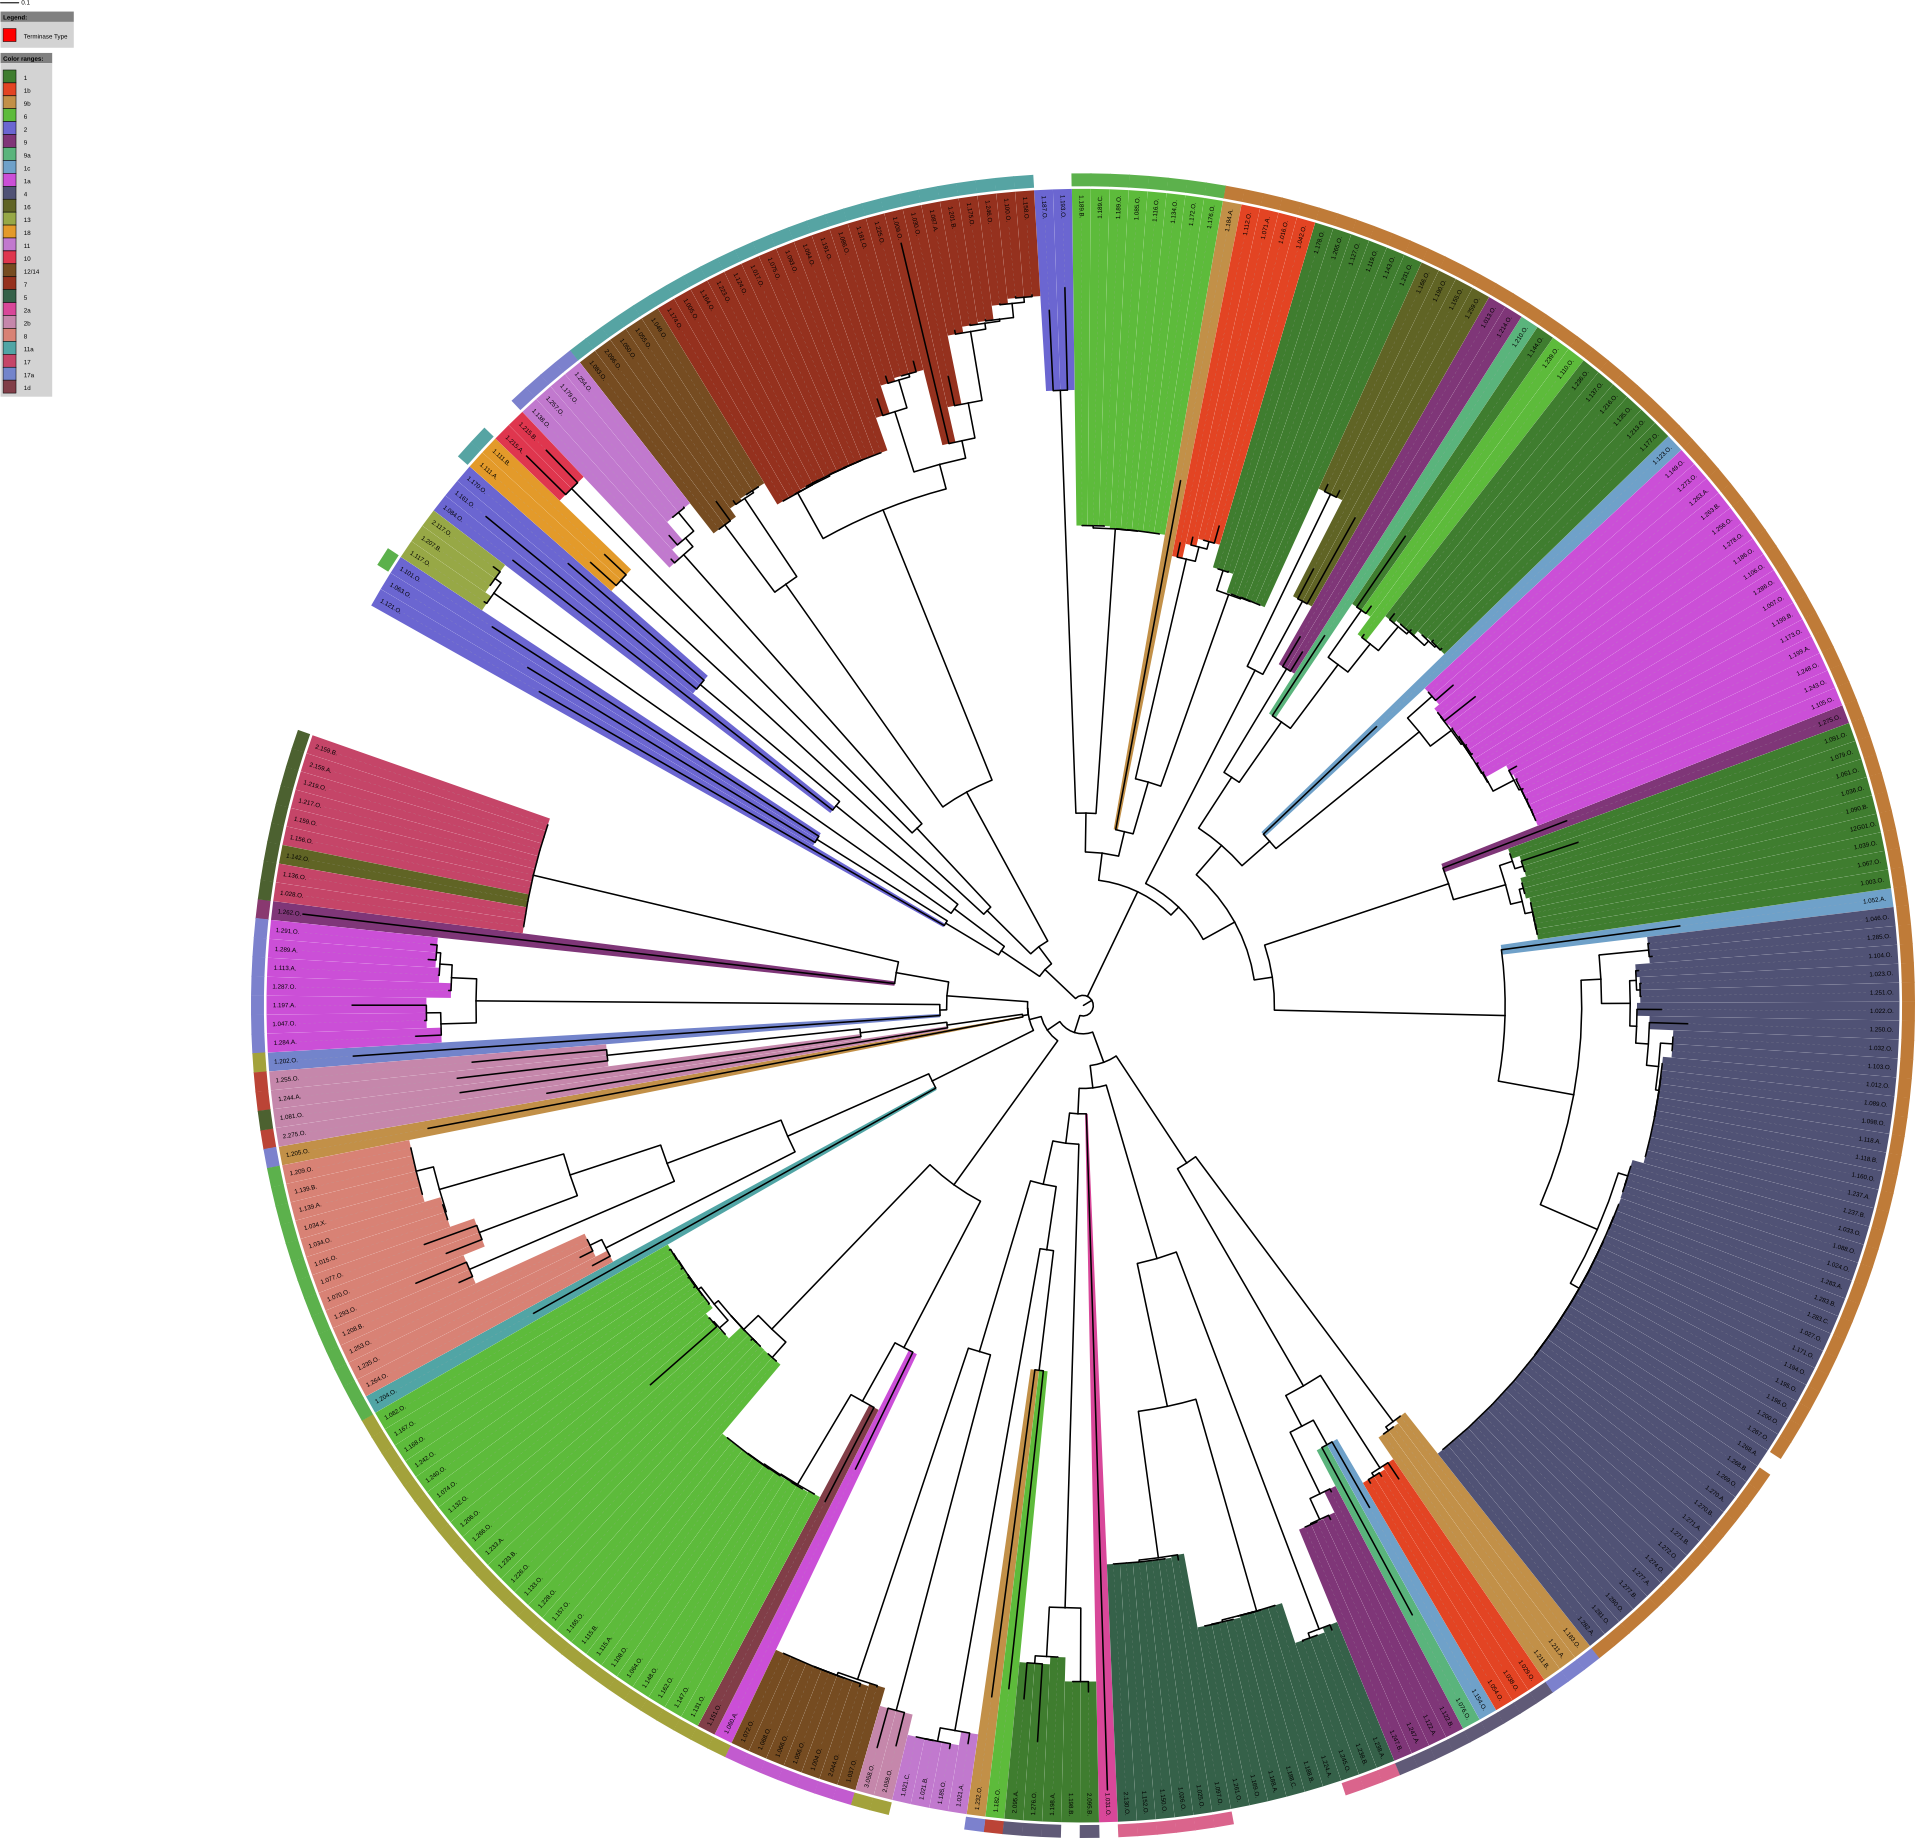

In [153]:
Image("./nahant_only/nahant_only_tree1.png",width=800)

>Colored by JMB preliminary groups based on blast comparison

In [150]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', './nahant_only/nahant_phage_terminases.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'Nahant Phages')
itol_uploader.add_variable("colorDefinitionFile", "./nahant_only/phate_term_defs.txt")
status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998782452651714398383450&restore_saved=1


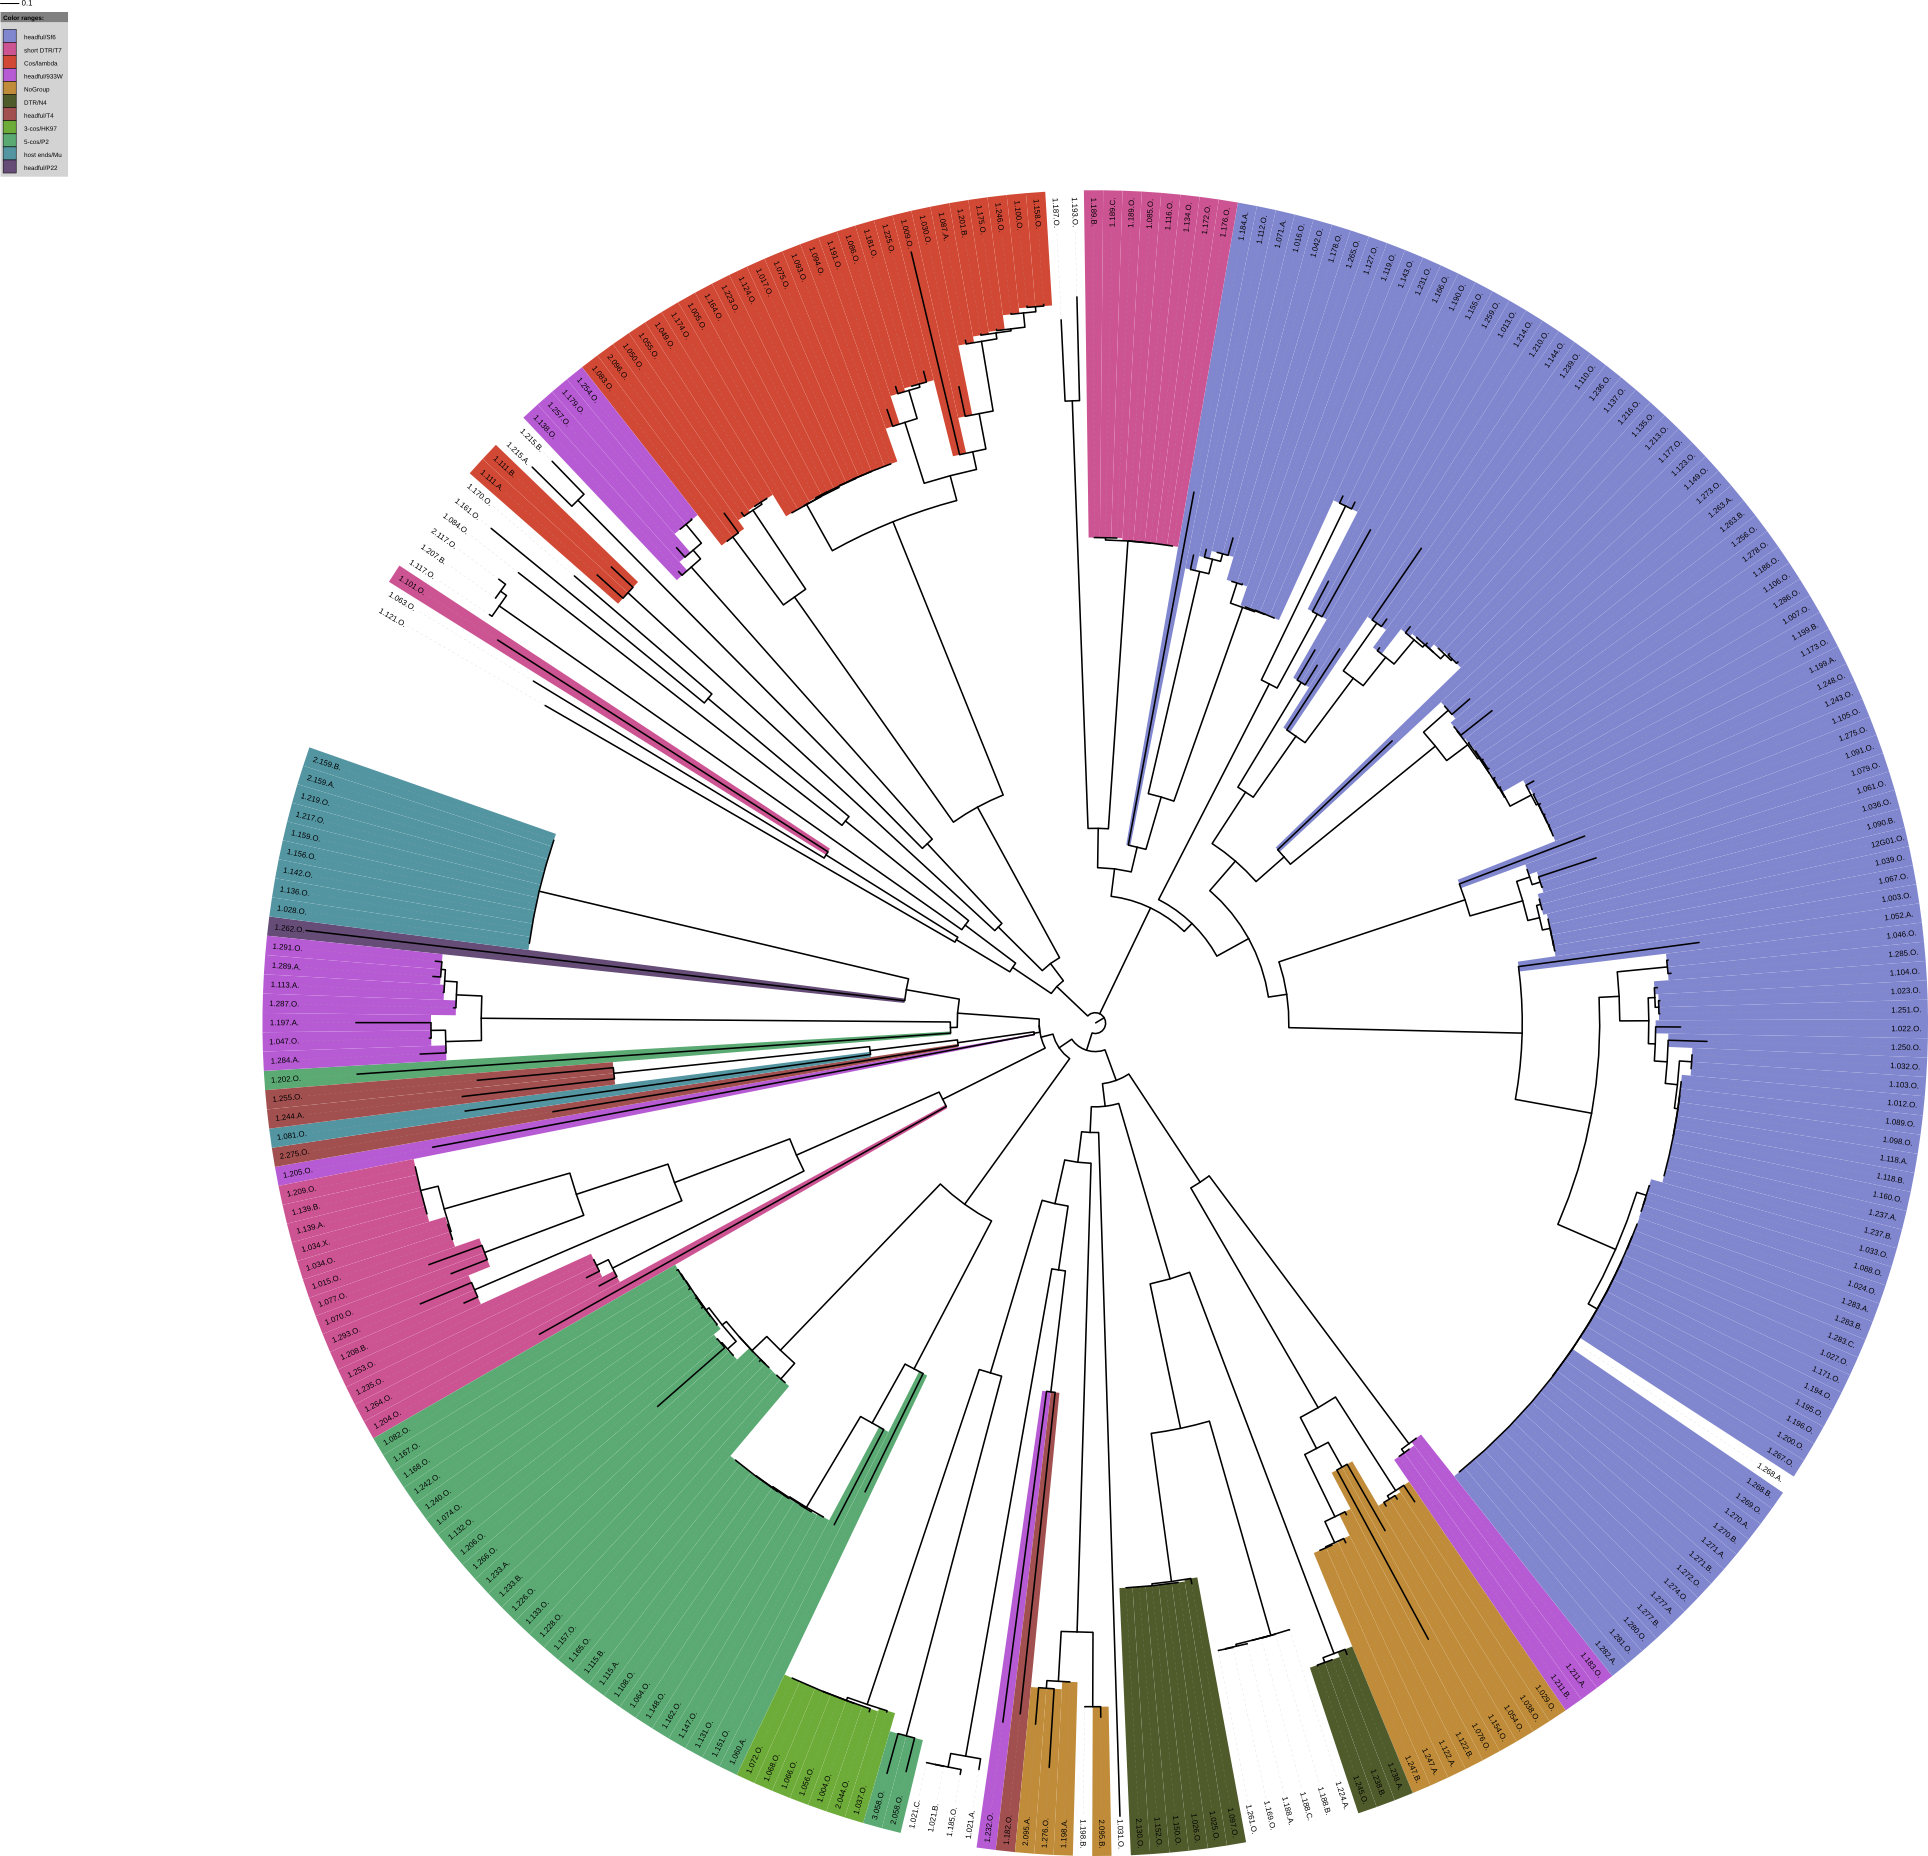

In [163]:
Image("./nahant_only/terminase_colored.png", width=800)

In [158]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', './nahant_only/nahant_phage_terminases.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'Nahant Phages')
itol_uploader.add_variable("colorDefinitionFile", "./nahant_only/kkgrp_defs.txt")

itol_uploader.add_variable("dataset2File","./nahant_only/terminase.cols.txt")
itol_uploader.add_variable("dataset2Type","colorstrip")
itol_uploader.add_variable("dataset2StripWidth","20")
itol_uploader.add_variable("dataset2Label","Terminase Type")
itol_uploader.add_variable("dataset2Separator","tab")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998782453030914398390740&restore_saved=1


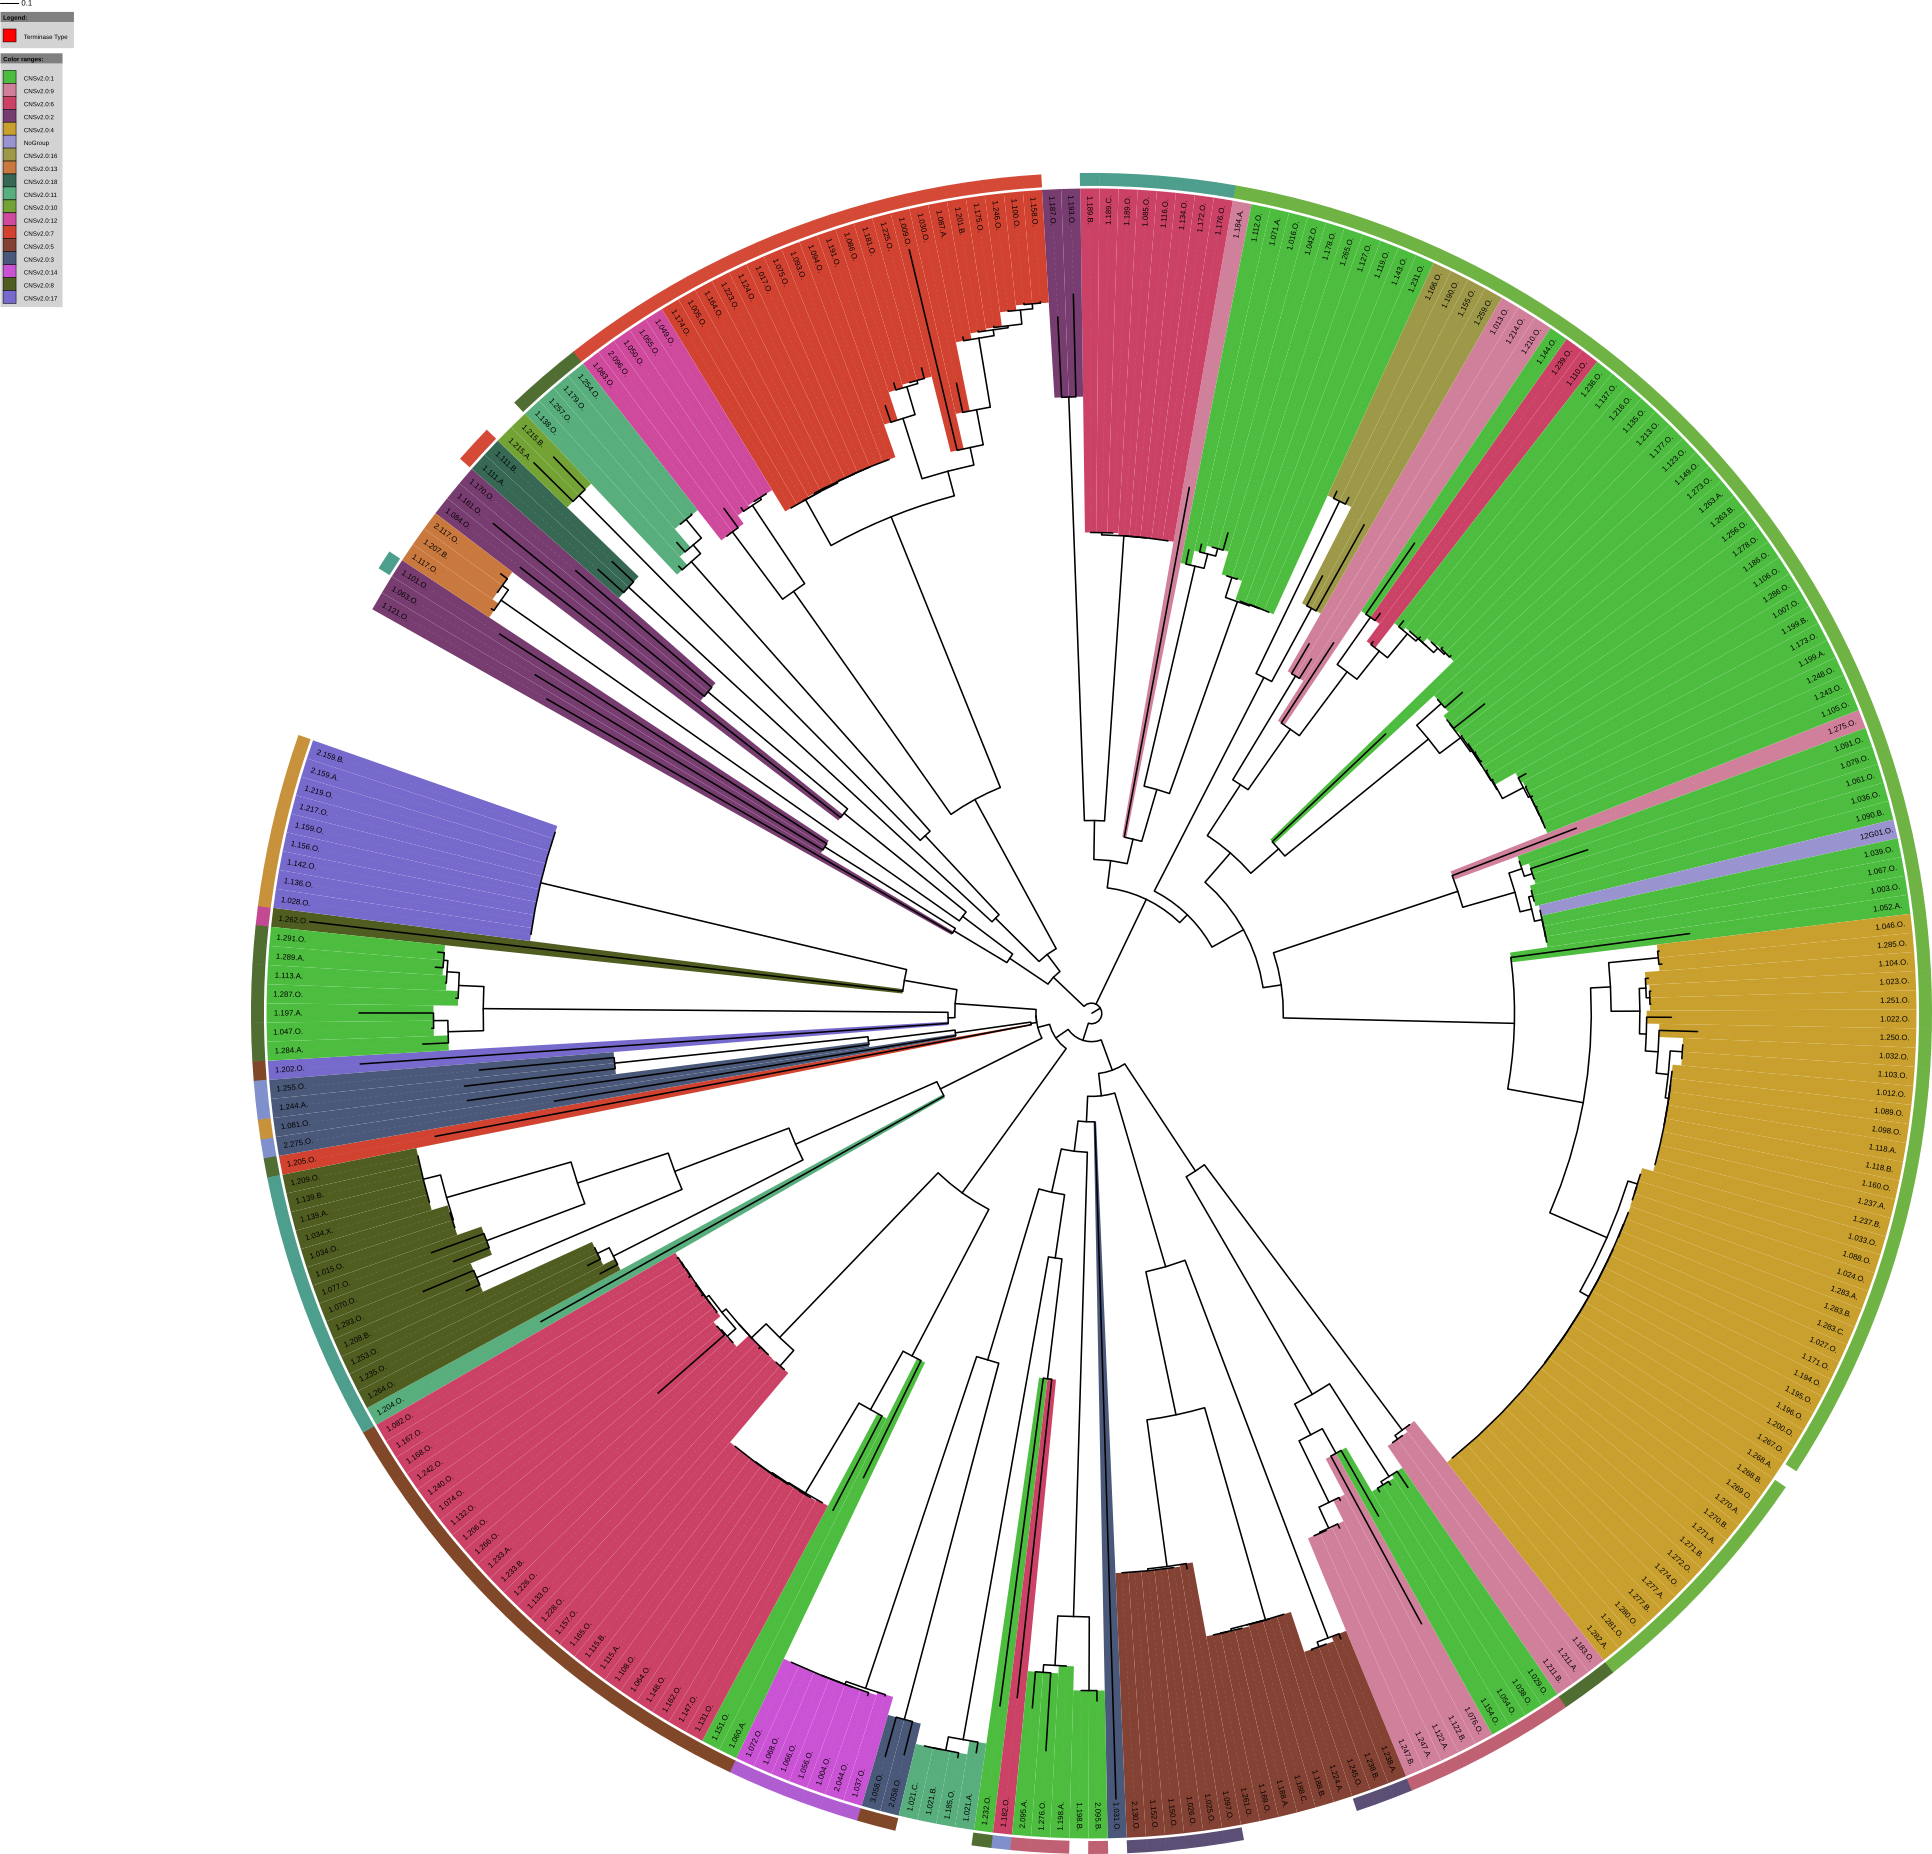

In [164]:
Image("./nahant_only/kkgrp_colored.png", width=800)

In [52]:
itol_uploader = Itol.Itol()
itol_uploader.add_variable('treeFile', './nahant_only/nahant_phage_terminases.40.tree')
itol_uploader.add_variable('treeFormat', 'newick')
itol_uploader.add_variable('treeName', 'Nahant Phages')
itol_uploader.add_variable("colorDefinitionFile", "./nahant_only/terminase.simple.def.txt")

itol_uploader.add_variable("dataset1File","./nahant_only/simple_coverage_cols.txt")
itol_uploader.add_variable("dataset1Type","colorstrip")
itol_uploader.add_variable("dataset1StripWidth","50")
itol_uploader.add_variable("dataset1Label","Coverage Type")
itol_uploader.add_variable("dataset1Separator","tab")

status = itol_uploader.upload()
itol_uploader.comm.upload_output
print itol_uploader.get_webpage()

http://itol.embl.de/external.cgi?tree=12998781851783314399195330&restore_saved=1


Comparing Tree Structures with Differing levels of gap and position entropy